# Colour - HDRI - Examples: Vignette Characterisation & Correction

This example showcase various vignette characterisation and correction methods.


In [1]:
import colour
import colour_hdri
import numpy as np

colour.plotting.colour_style()

colour.utilities.describe_environment();

*                                                                             *
*   Interpreter :                                                             *
*       python : 3.9.12 (main, Mar 26 2022, 15:44:31)                         *
*                [Clang 13.1.6 (clang-1316.0.21.2)]                           *
*                                                                             *
*   colour-science.org :                                                      *
*       colour : 0.4.1                                                        *
*       colour-hdri : v0.1.8-149-gcd15ac9                                     *
*                                                                             *
*   Runtime :                                                                 *
*       imageio : 2.19.3                                                      *
*       matplotlib : 3.5.2                                                    *
*       numpy : 1.23.1                  

## Synthetic Data Generation

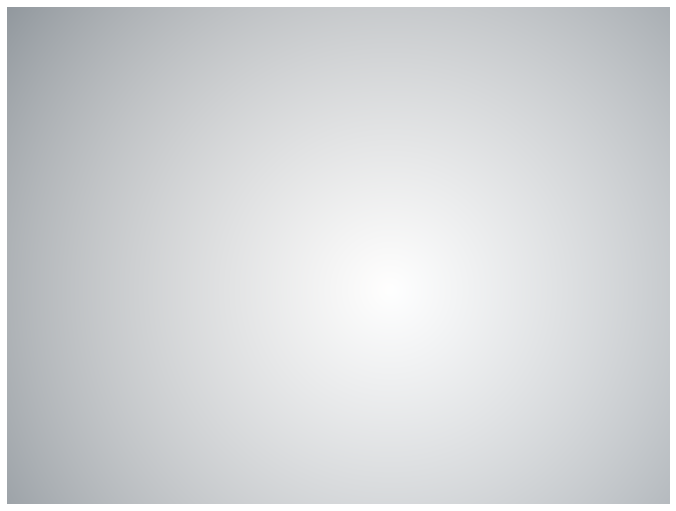

In [2]:
constant = colour.utilities.ones([3000, 4000, 3])
image = np.copy(constant)

image[..., 0] = colour_hdri.distortion.apply_radial_gradient(
    image[..., 0], (2.0, 2.0), (0.450, 0.425)
)
image[..., 1] = colour_hdri.distortion.apply_radial_gradient(
    image[..., 1], (2.1, 2.1), (0.450, 0.425)
)
image[..., 2] = colour_hdri.distortion.apply_radial_gradient(
    image[..., 2], (2.2, 2.2), (0.450, 0.425)
)

colour.plotting.plot_image(colour.cctf_encoding(image));

## 2D Function

### Vignette Characterisation

In [3]:
characterisation_data = colour_hdri.characterise_vignette(
    image, method="2D Function"
)

print(characterisation_data.parameters)
print(characterisation_data.center)

[[-3.19143844 -0.05296161  0.9        -2.12211248 -0.09980934  0.9       ]
 [-2.99141148 -0.02880998  0.9        -1.97970964 -0.081436    0.9       ]
 [-2.80965382 -0.00688923  0.9        -1.85058453 -0.06477854  0.9       ]]
[ 0.56982046  0.57861647]


### Vignette Correction

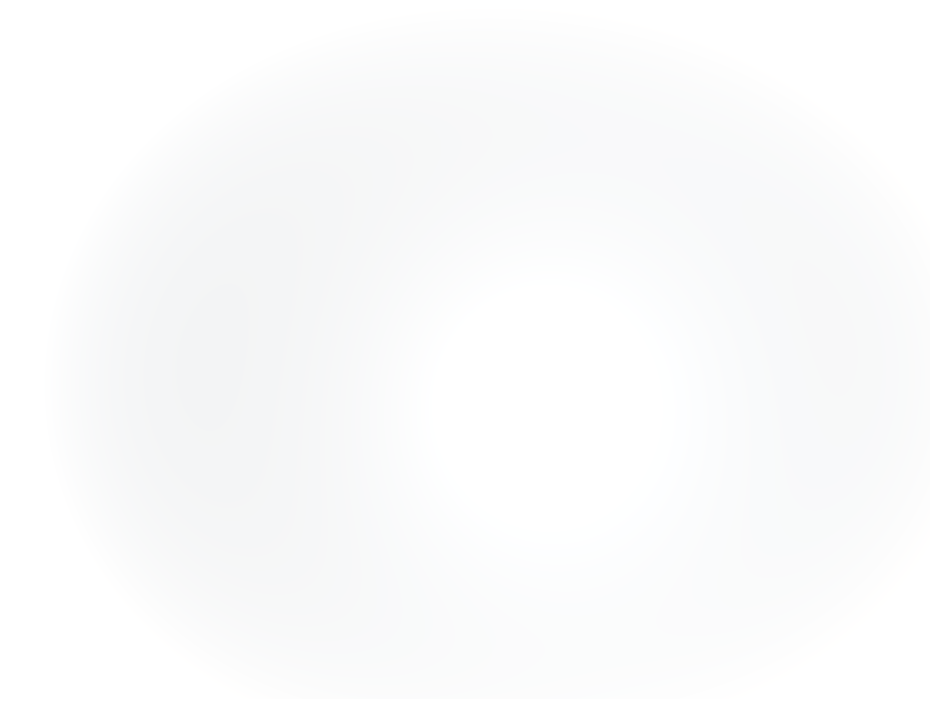

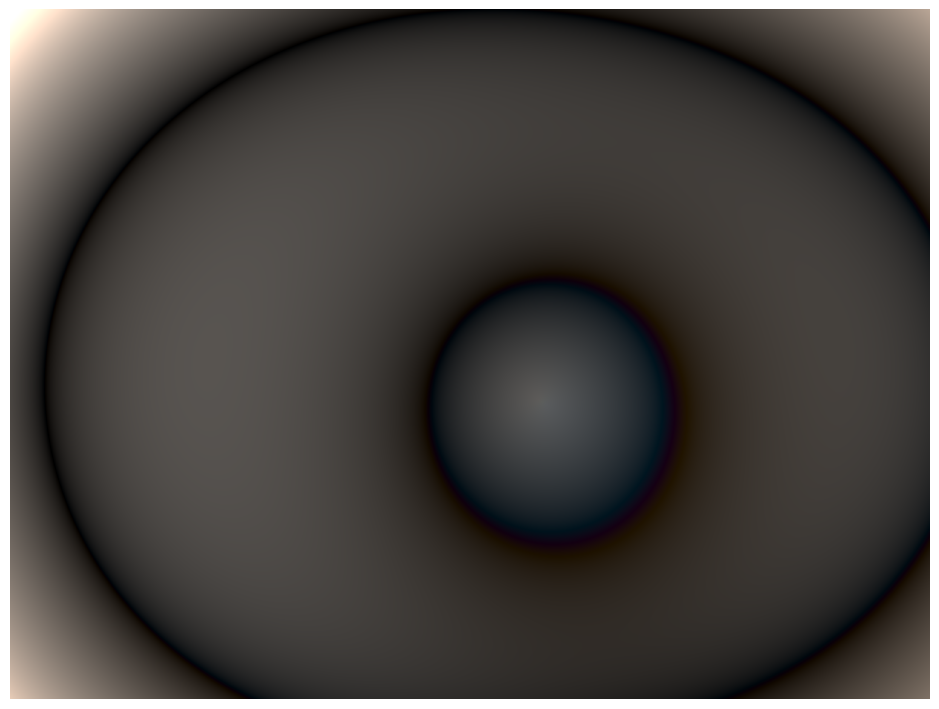

In [4]:
corrected = colour_hdri.correct_vignette(
    image, characterisation_data, method="2D Function"
)

colour.plotting.plot_image(colour.cctf_encoding(corrected))

colour.plotting.plot_image(colour.cctf_encoding(np.abs(constant - corrected)));

# Bivariate Spline

## Vignette Characterisation

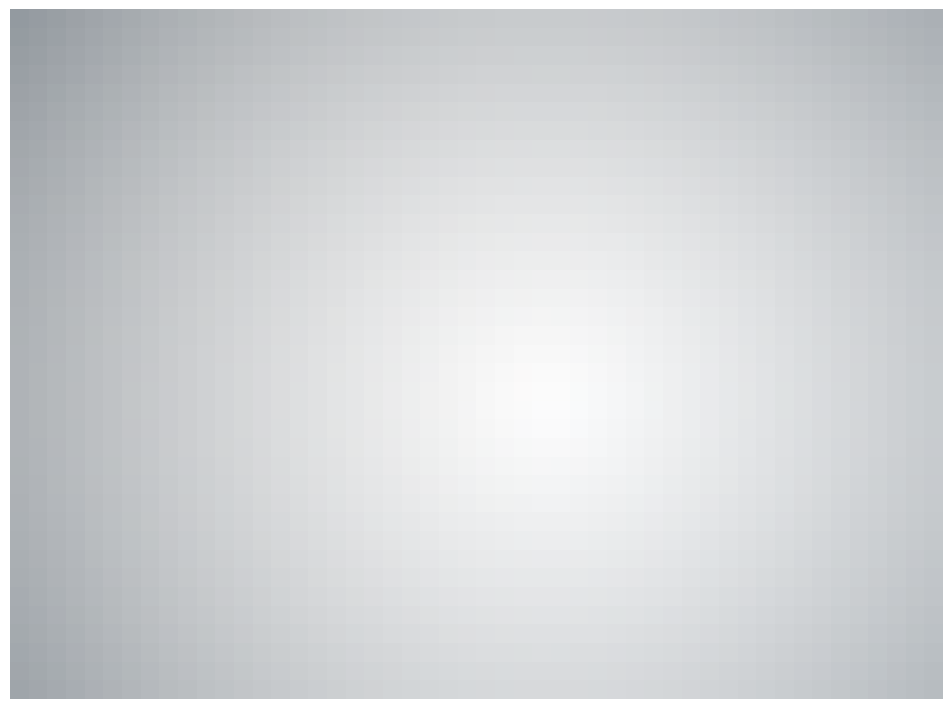

In [5]:
characterisation_data = colour_hdri.characterise_vignette(
    image, method="Bivariate Spline"
)

colour.plotting.plot_image(
    colour.cctf_encoding(characterisation_data.parameters)
);

### Vignette Correction


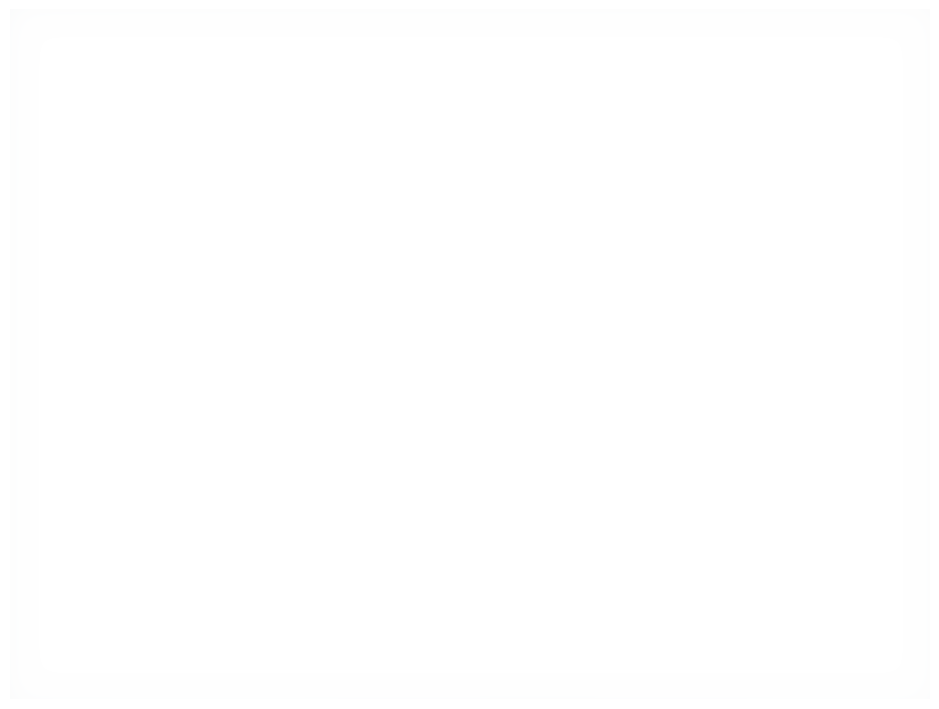

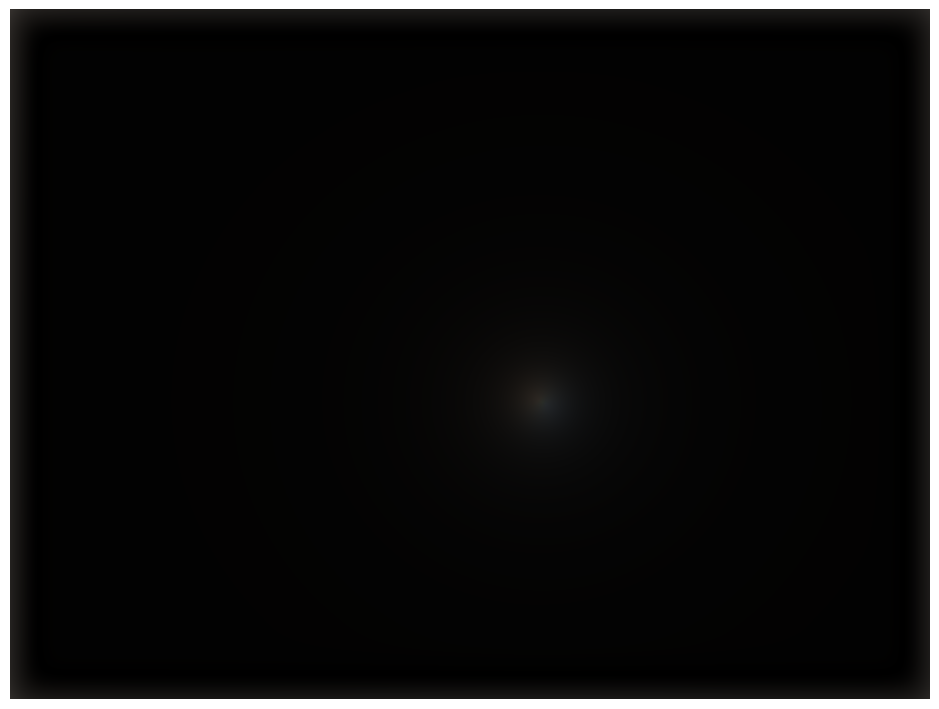

In [6]:
corrected = colour_hdri.correct_vignette(
    image, characterisation_data, method="Bivariate Spline"
)

colour.plotting.plot_image(colour.cctf_encoding(corrected))

colour.plotting.plot_image(colour.cctf_encoding(np.abs(constant - corrected)));

## Radial Basis Functions

## Vignette Characterisation

In [7]:
characterisation_data = colour_hdri.characterise_vignette(image, method="RBF")

print(characterisation_data.parameters)

[[ 0.4446814   0.4668379   0.48698009]
 [ 0.58306418  0.60720149  0.62914431]
 [ 0.53228617  0.55538655  0.57634875]
 [ 0.4867184   0.50921351  0.52963527]
 [ 0.28593502  0.31565077  0.34266503]
 [ 0.33751446  0.36477841  0.38956369]
 [ 0.37939082  0.4047357   0.42777536]
 [ 0.40882621  0.43294137  0.45486067]
 [ 0.42391045  0.44759238  0.46911392]
 [ 0.42441438  0.44841129  0.470215  ]
 [ 0.41530149  0.44007479  0.4625807 ]
 [ 0.39769785  0.42368099  0.44728365]
 [ 0.37233258  0.39990328  0.42494688]
 [ 0.34043571  0.36989282  0.39664992]
 [ 0.39992237  0.42932377  0.45602259]
 [ 0.46232782  0.48927122  0.51373406]
 [ 0.51486077  0.53991628  0.56266359]
 [ 0.55313224  0.5770426   0.59875317]
 [ 0.57328753  0.59689744  0.61834286]
 [ 0.57396811  0.5980204   0.61987595]
 [ 0.56173445  0.58665545  0.60930621]
 [ 0.53851088  0.56470578  0.58851794]
 [ 0.50586368  0.5336809   0.55896918]
 [ 0.46593126  0.4956464   0.52266001]
 [ 0.38406121  0.40916216  0.43198035]
 [ 0.4697828   0.49098227

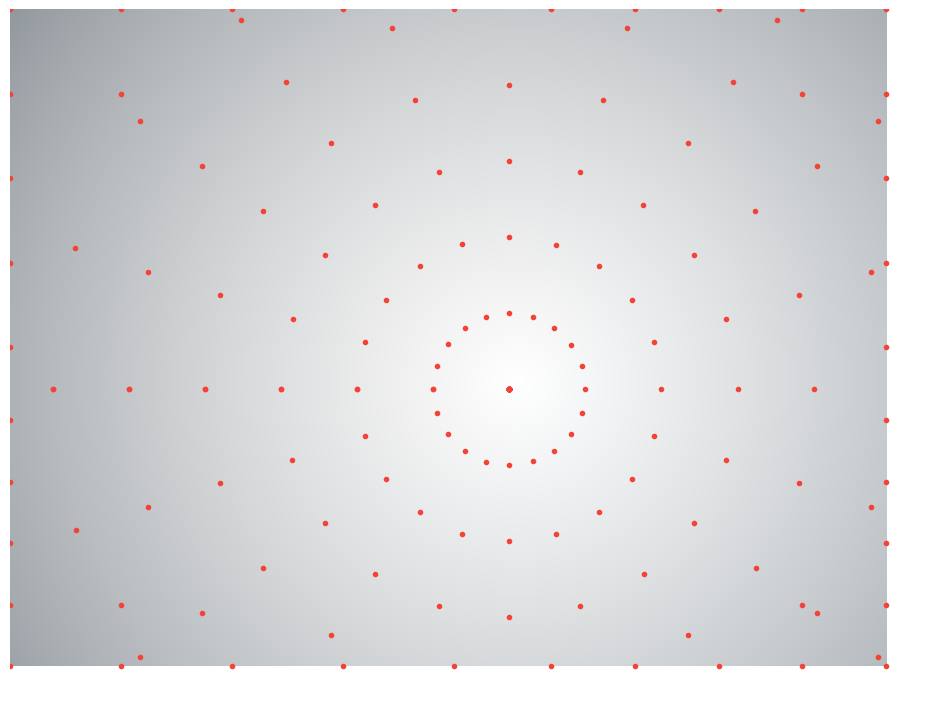

In [8]:
figure, axes = colour.plotting.plot_image(
    colour.cctf_encoding(image), standalone=False
)

sampling_coordinates = (
    colour_hdri.distortion.vignette.vignette_sampling_coordinates(
        characterisation_data.center,
        image.shape[1] / image.shape[0],
    )
)

axes.scatter(
    sampling_coordinates[..., 0] * image.shape[1],
    sampling_coordinates[..., 1] * image.shape[0],
);

## Vignette Correction

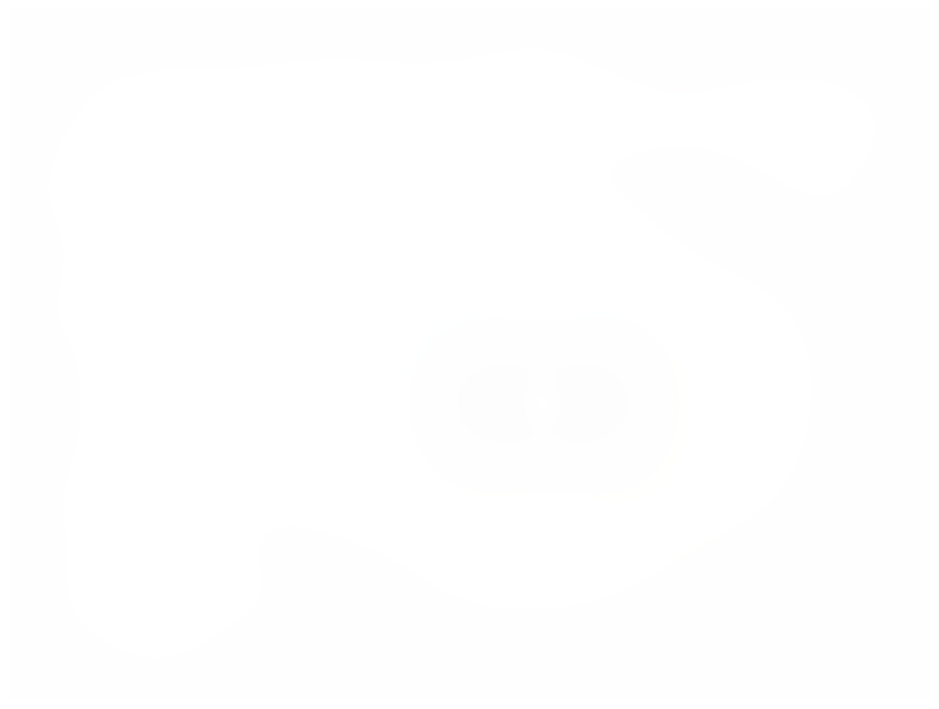

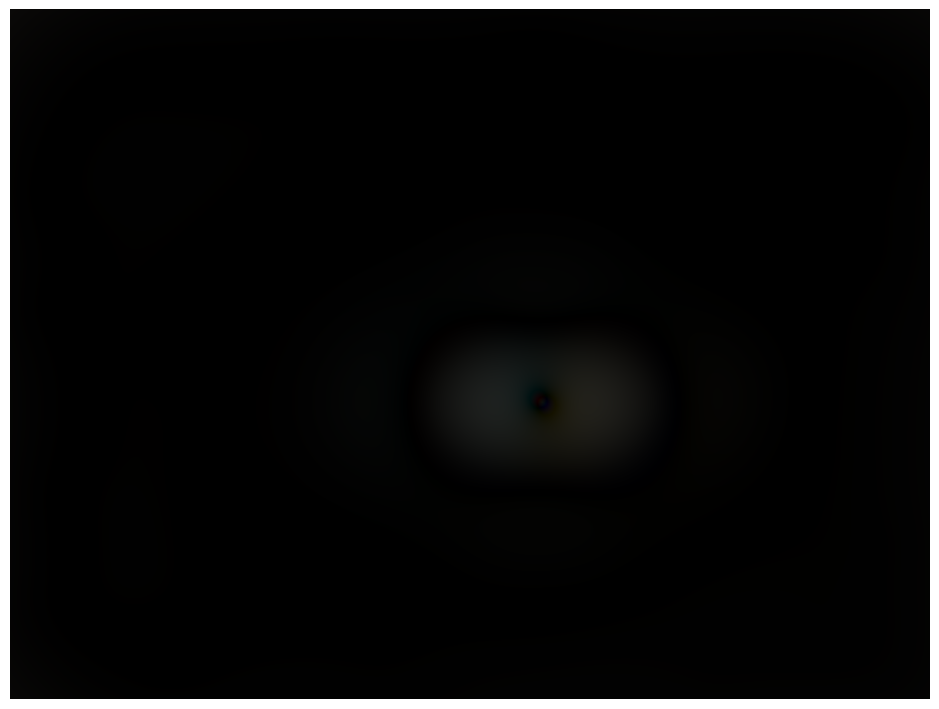

In [9]:
corrected = colour_hdri.correct_vignette(
    image, characterisation_data, method="RBF"
)

colour.plotting.plot_image(colour.cctf_encoding(corrected))

colour.plotting.plot_image(colour.cctf_encoding(np.abs(constant - corrected)));